<a href="https://colab.research.google.com/github/KimyYoungWook/DataScience/blob/main/practice/Fashion_MNIST_09_%EC%9D%98%EB%A5%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10가지의 의류(0~9)를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(X_train, y_train), (X_test, y_test) = load_data()

데이터 형태확인

In [2]:
# 훈련데이터 
print(X_train.shape,y_train.shape)
print(y_train)

# 테스트 데이터
print(X_test.shape,y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[9 0 0 ... 3 0 5]
(10000, 28, 28) (10000,)
[9 2 1 ... 8 1 5]


데이터 그려보기

In [3]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


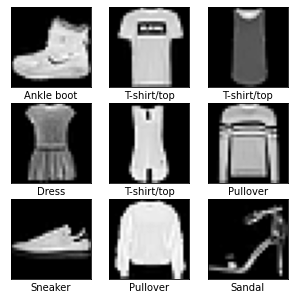

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

전처리 및 검증 데이터셋 만들기

In [5]:
# 값의 범위를 0~1 사이로 만들기 -> 스케일링 -> minmax 알고리즘
# 데이터 스케일링 0~255 -> 0~ 1 MinMax 알고리즘 사용
X_train =X_train/255
X_test = X_test/255

In [6]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [7]:
# 레이블 (정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0~9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# 검증 데이터 세트 만들기
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,
                                               test_size=0.3,
                                               random_state=777)

첫번째 모델 구성하기

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape =(28,28)))# Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

첫 번쨰 모델설정하기

In [10]:
first_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
first_history =first_model.fit(X_train,y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/30
329/329 [==============================] - 17s 6ms/step - loss: 0.9401 - accuracy: 0.6846 - val_loss: 0.5074 - val_accuracy: 0.8178
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4515 - accuracy: 0.8408 - val_loss: 0.4133 - val_accuracy: 0.8586
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3996 - accuracy: 0.8584 - val_loss: 0.3934 - val_accuracy: 0.8640
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3816 - accuracy: 0.8638 - val_loss: 0.3867 - val_accuracy: 0.8649
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3579 - accuracy: 0.8703 - val_loss: 0.3589 - val_accuracy: 0.8718
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 0.8809 - val_loss: 0.3551 - val_accuracy: 0.8735
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3232 - accuracy: 0.8840 - val_loss: 0.3500 - val_accuracy: 0.8763
Epoch

두번째 모델 구성 및 학습

In [12]:
second_model = Sequential()
second_model.add(Flatten(input_shape =(28,28)))# Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu')) # 128개의 출력을 가지는 Dense 층을 추가 <- 기존 모델보다 층 하나 더추가
second_model.add(Dense(64, activation='relu')) # 64개의 출력을 가지는 Dense 층
second_model.add(Dense(32, activation='relu')) # 32개의 출력을 가지는 Dense 층
second_model.add(Dense(10, activation='softmax')) # 10개의 출력을 가지는 Dense 층

second_model.compile(loss='categorical_crossentropy', # 손실함수 
              optimizer='adam',  # 옵티마이저
              metrics=['accuracy']) # 모니터링 할 평가지표 : acc(정확도)

second_history =second_model.fit(X_train,y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_val,y_val))

Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.8897 - accuracy: 0.6906 - val_loss: 0.4626 - val_accuracy: 0.8282
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4230 - accuracy: 0.8467 - val_loss: 0.4112 - val_accuracy: 0.8527
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3756 - accuracy: 0.8663 - val_loss: 0.3633 - val_accuracy: 0.8724
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3488 - accuracy: 0.8748 - val_loss: 0.3587 - val_accuracy: 0.8725
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3255 - accuracy: 0.8775 - val_loss: 0.3478 - val_accuracy: 0.8766
Epoch 6/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3067 - accuracy: 0.8897 - val_loss: 0.3537 - val_accuracy: 0.8718
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3002 - accuracy: 0.8880 - val_loss: 0.3284 - val_accuracy: 0.8838
Epoch 

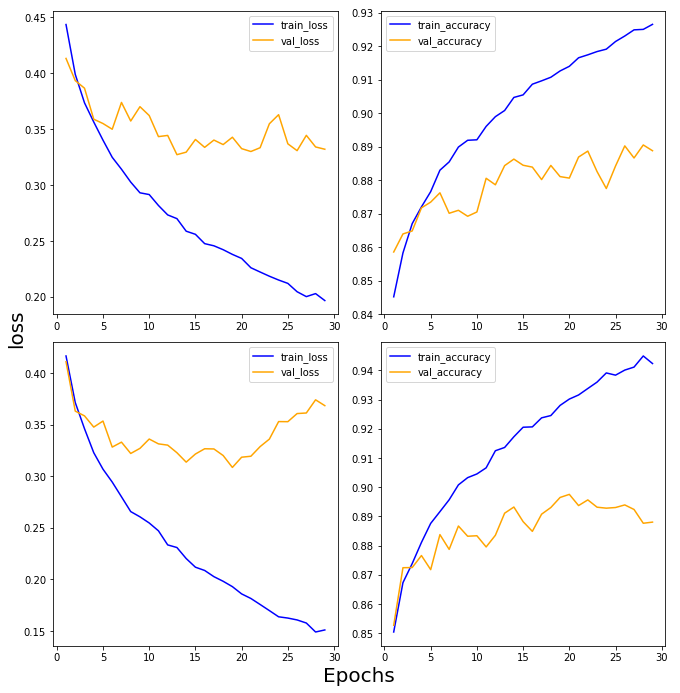

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)

모델  평가하기

In [16]:
print(first_model.evaluate(X_test,y_test))
print(second_model.evaluate(X_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8751
[0.3742325007915497, 0.8751000165939331]
313/313 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8754
[0.40554019808769226, 0.8754000067710876]


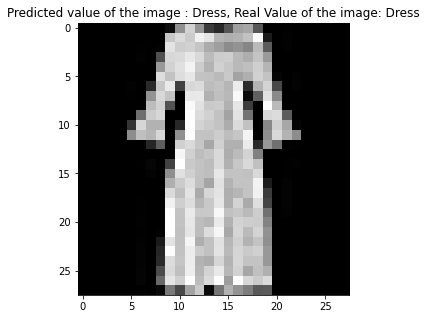

In [23]:
import numpy as np

results = first_model.predict(X_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(X_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()
